In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_got = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city=city_got.city_name
    country =city_got.country_code
    # If the city is unique, then add it to a our cities list
    if city+','+country not in cities:
        cities.append(city+','+country)
        #break
    
# Print the city count to confirm sufficient count
print(len(cities))
"us"  in [cities[i].split(',')[1] for i in range(len(cities))]


604


True

## Perform API Calls

In [119]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#using city id query:
#query_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key+ "&id=3104342"
columns = ['City',"Country",'Lon','Lat','humidity', 'temp','clouds','wind speed(mph)']
weather_df=pd.DataFrame(index=cities, columns=columns)

i=0
for city in cities:
    i+=1
    query_url=url+"&q="+city
    weather_json  = requests.get(query_url).json()
    try:
        print(f"Processing {i}th record:  ", "CityId= ",weather_json["id"],'  CityName= ',weather_json["name"]+','+weather_json["sys"]["country"])
    except (KeyError,ValueError): 
        print(f"The city {city} is not found in openweathermap.")
        continue
    try:
        weather_df.loc[city,'Lon']=weather_json['coord']['lon']
        weather_df.loc[city,'Lat']=weather_json['coord']['lat']
        weather_df.loc[city,'clouds']=list(weather_json['clouds'].values())[0]
        weather_df.loc[city,'humidity']=weather_json["main"]["humidity"]
        weather_df.loc[city,'temp']=weather_json["main"]["temp_max"]
        weather_df.loc[city,'wind speed(mph)']=weather_json["wind"]['speed']
        weather_df.loc[city,'City']=weather_json["name"]
        weather_df.loc[city,'Country']=weather_json["sys"]["country"]
    except (KeyError,ValueError):  
        pass
    #i+=1
    #if i==10:
        #break
weather_df.dropna(axis=0, how='any',inplace=True)
weather_df.head()
##api.openweathermap.org/data/2.5/weather?lat=35&lon=139

Processing 1th record:   CityId=  3931275   CityName=  Putina,PE
Processing 2th record:   CityId=  964432   CityName=  Port Alfred,ZA
Processing 3th record:   CityId=  2191562   CityName=  Dunedin,NZ
Processing 4th record:   CityId=  6185377   CityName=  Yellowknife,CA
Processing 5th record:   CityId=  933995   CityName=  Souillac,MU
Processing 6th record:   CityId=  3662616   CityName=  Cruzeiro do Sul,BR
Processing 7th record:   CityId=  2123814   CityName=  Leningradskiy,RU
The city mataura,pf is not found in openweathermap.
The city barentsburg,sj is not found in openweathermap.
Processing 10th record:   CityId=  1507390   CityName=  Dikson,RU
Processing 11th record:   CityId=  3874787   CityName=  Punta Arenas,CL
Processing 12th record:   CityId=  3833367   CityName=  Ushuaia,AR
The city attawapiskat,ca is not found in openweathermap.
Processing 14th record:   CityId=  2137773   CityName=  Vao,NC
Processing 15th record:   CityId=  1264976   CityName=  Leh,IN
Processing 16th record

Processing 125th record:   CityId=  3573061   CityName=  Saint George,BM
Processing 126th record:   CityId=  2019135   CityName=  Nizhniy Kuranakh,RU
Processing 127th record:   CityId=  1106677   CityName=  Bambous Virieux,MU
Processing 128th record:   CityId=  2163055   CityName=  Horsham,AU
Processing 129th record:   CityId=  720228   CityName=  Halmaj,HU
Processing 130th record:   CityId=  739600   CityName=  Sinop,TR
Processing 131th record:   CityId=  3982292   CityName=  Tayoltita,MX
Processing 132th record:   CityId=  5880568   CityName=  Bethel,US
Processing 133th record:   CityId=  3860443   CityName=  Comodoro Rivadavia,AR
Processing 134th record:   CityId=  6167817   CityName=  Torbay,CA
The city laguna,br is not found in openweathermap.
Processing 136th record:   CityId=  241131   CityName=  Victoria,SC
Processing 137th record:   CityId=  3421719   CityName=  Narsaq,GL
Processing 138th record:   CityId=  5924351   CityName=  Clyde River,CA
Processing 139th record:   CityId=

Processing 246th record:   CityId=  2122090   CityName=  Pevek,RU
Processing 247th record:   CityId=  1173491   CityName=  Kohat,PK
Processing 248th record:   CityId=  2874545   CityName=  Burg,DE
Processing 249th record:   CityId=  5861897   CityName=  Fairbanks,US
Processing 250th record:   CityId=  4500920   CityName=  Brigantine,US
Processing 251th record:   CityId=  2460954   CityName=  Araouane,ML
Processing 252th record:   CityId=  1337607   CityName=  Kudahuvadhoo,MV
Processing 253th record:   CityId=  5983720   CityName=  Iqaluit,CA
Processing 254th record:   CityId=  3576994   CityName=  Cockburn Town,TC
Processing 255th record:   CityId=  1026014   CityName=  Tete,MZ
Processing 256th record:   CityId=  5554428   CityName=  Ketchikan,US
Processing 257th record:   CityId=  2012593   CityName=  Zeya,RU
Processing 258th record:   CityId=  996918   CityName=  Hennenman,ZA
The city gat,ly is not found in openweathermap.
Processing 260th record:   CityId=  1293625   CityName=  Dawe

Processing 369th record:   CityId=  2127515   CityName=  Wakkanai,JP
Processing 370th record:   CityId=  3420846   CityName=  Qaqortoq,GL
Processing 371th record:   CityId=  3580661   CityName=  George Town,KY
Processing 372th record:   CityId=  2301217   CityName=  Ejura,GH
Processing 373th record:   CityId=  933238   CityName=  Nata,BW
Processing 374th record:   CityId=  5367788   CityName=  Lompoc,US
Processing 375th record:   CityId=  3905792   CityName=  San Borja,BO
Processing 376th record:   CityId=  2221530   CityName=  Tibati,CM
Processing 377th record:   CityId=  933182   CityName=  Palapye,BW
Processing 378th record:   CityId=  1646170   CityName=  Ciawi,ID
Processing 379th record:   CityId=  1056899   CityName=  Sambava,MG
Processing 380th record:   CityId=  6355222   CityName=  Yulara,AU
Processing 381th record:   CityId=  1242110   CityName=  Kalmunai,LK
Processing 382th record:   CityId=  3448903   CityName=  Sao Joao da Barra,BR
Processing 383th record:   CityId=  11683

Processing 490th record:   CityId=  1640044   CityName=  Kijang,ID
Processing 491th record:   CityId=  2640377   CityName=  Penzance,GB
Processing 492th record:   CityId=  1624725   CityName=  Tarakan,ID
The city jibuti,dj is not found in openweathermap.
Processing 494th record:   CityId=  487928   CityName=  Novikovo,RU
Processing 495th record:   CityId=  1853514   CityName=  Owase,JP
Processing 496th record:   CityId=  5745380   CityName=  Pendleton,US
Processing 497th record:   CityId=  478050   CityName=  Ust-Kulom,RU
Processing 498th record:   CityId=  2206894   CityName=  Hokitika,NZ
Processing 499th record:   CityId=  3137469   CityName=  Sorland,NO
Processing 500th record:   CityId=  1538648   CityName=  Toktogul,KG
Processing 501th record:   CityId=  3347353   CityName=  Menongue,AO
Processing 502th record:   CityId=  6144312   CityName=  Sept-Iles,CA
Processing 503th record:   CityId=  5972762   CityName=  Hay River,CA
Processing 504th record:   CityId=  605155   CityName=  K

,City,Country,Lon,Lat,humidity,temp,clouds,wind speed(mph)
"putina,pe",Putina,PE,-69.87,-14.91,17,57.2,40,4.7
"port alfred,za",Port Alfred,ZA,26.89,-33.59,95,65.19,44,13.15
"dunedin,nz",Dunedin,NZ,170.5,-45.87,75,37.83,12,21.88
"yellowknife,ca",Yellowknife,CA,-114.38,62.45,87,42.8,75,8.05
"souillac,mu",Souillac,MU,57.52,-20.52,69,75.2,75,13.87


##  Your objective is to build a series of scatter plots to showcase the following relationships:


> -  Temperature (F) vs. Latitude
-  Humidity (%) vs. Latitude
-  Cloudiness (%) vs. Latitude
-  Wind Speed (mph) vs. Latitude


## Your final notebook must:


> -  Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
-  Perform a weather check on each of the cities using a series of successive API calls.
-  Include a print log of each city as it's being processed with the city number and city name.
-  Save both a CSV of all data retrieved and png images for each scatter plot.

534

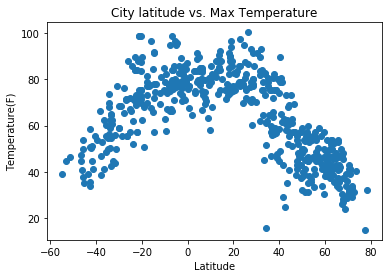

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
s1=ax.scatter(weather_df["Lat"],weather_df["temp"])
s2=ax.set_xlabel("Latitude")
s3=ax.set_ylabel("Temperature(F)")
s4=ax.set_title("City latitude vs. Max Temperature")
fig.savefig("latitude_Max-Temperature.png")
len(weather_df)

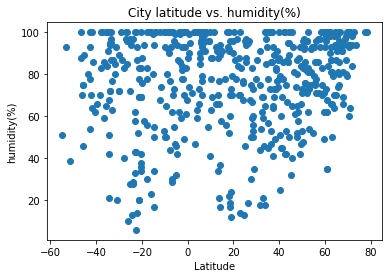

In [122]:
fig, ax = plt.subplots()
s1=ax.scatter(weather_df["Lat"],weather_df["humidity"])
s2=ax.set_xlabel("Latitude")
s3=ax.set_ylabel("humidity(%)")
s4=ax.set_title("City latitude vs. humidity(%)")
fig.savefig("latitude_humidity.png")
#plt.show()

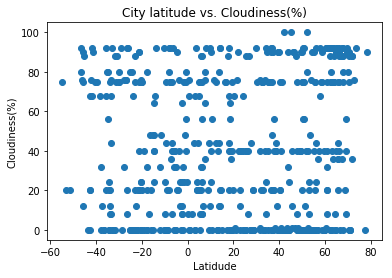

In [123]:
fig, ax = plt.subplots()
s1=ax.scatter(weather_df["Lat"],weather_df["clouds"])
s2=ax.set_xlabel("Latidude")
s3=ax.set_ylabel("Cloudiness(%)")
s4=ax.set_title("City latitude vs. Cloudiness(%)")
fig.savefig("latitude_Cloudiness(mph).png")
#plt.show()

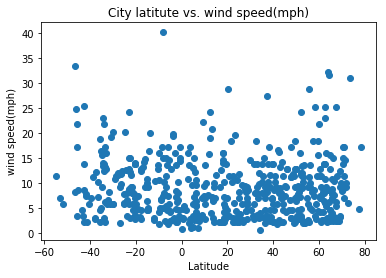

In [124]:
fig, ax = plt.subplots()
s1=ax.scatter(weather_df["Lat"],weather_df["wind speed(mph)"])
s2=ax.set_xlabel("Latitude")
s3=ax.set_ylabel("wind speed(mph)")
s4=ax.set_title("City latitute vs. wind speed(mph)")
fig.savefig("latitude_wind-speed(mph).png")
#plt.show()



## Some observations:
> -  From the weather data for 538 cities collectd today(09/25/2018), we conclude that temperature is peaked around 80 Fahrenheit  near the equator from -20 to 30 degrees of Latitude. It drops to 30 Fahrenheit(even lower for several cities) in the region of 60 to 80 degree of latitude.

> -  The humidity percentage has only weak dependence on the latitude. It takes very smallest value around -20(Southern Hemisphere) and 20 latitude(Northern Hemisphere).

> -  There is no obvious dependence of wind speed on latitude.

> -  There is no obvious dependence of cloudiness on latitude.


In [125]:
# save the weather Data to the cities.csv file:
weather_df.reset_index(inplace=True);
del weather_df["index"]
weather_df.to_csv(output_data_file)

In [126]:
weather_df.head()

,City,Country,Lon,Lat,humidity,temp,clouds,wind speed(mph)
0,Putina,PE,-69.87,-14.91,17,57.2,40,4.7
1,Port Alfred,ZA,26.89,-33.59,95,65.19,44,13.15
2,Dunedin,NZ,170.5,-45.87,75,37.83,12,21.88
3,Yellowknife,CA,-114.38,62.45,87,42.8,75,8.05
4,Souillac,MU,57.52,-20.52,69,75.2,75,13.87
